In [24]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings 

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [32]:
df = pd.read_csv('Adani_Enterprise.csv') # data_importing
df.head(10) # fetching first 10 rows of dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-07,181.050003,195.000000,180.100006,192.899994,192.497574,9386323
1,2020-08-10,192.899994,198.300003,192.350006,195.699997,195.291718,4627306
2,2020-08-11,196.000000,199.800003,194.399994,195.850006,195.441422,2965963
3,2020-08-12,195.800003,200.750000,190.199997,197.699997,197.287537,3352636
4,2020-08-13,198.899994,203.300003,197.750000,200.750000,200.331192,3552469
5,2020-08-14,202.399994,204.500000,191.449997,196.199997,195.790695,6617104
6,2020-08-17,197.399994,201.649994,196.050003,197.800003,197.387344,3227005
7,2020-08-18,200.000000,216.800003,199.000000,213.699997,213.254181,13367091
8,2020-08-19,214.250000,245.399994,214.250000,239.550003,239.050262,19592028
9,2020-08-20,241.199997,245.000000,230.399994,234.000000,233.511810,9484513


In [33]:
# shape of data
print("Shape of data:",df.shape)

Shape of data: (745, 7)


In [34]:
# statistical description of data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,745.000000,745.000000,745.000000,745.000000,745.000000,7.450000e+02
mean,1813.924898,1848.396439,1774.906042,1812.004765,1809.769748,5.153096e+06
std,1010.166745,1021.323772,992.957041,1006.344539,1005.574004,5.956241e+06
min,181.050003,195.000000,180.100006,192.899994,192.497574,0.000000e+00
25%,1274.400024,1302.000000,1201.199951,1267.500000,1264.855713,1.672655e+06
50%,1714.000000,1744.099976,1683.000000,1715.500000,1713.057373,3.161306e+06
75%,2391.000000,2405.699951,2336.500000,2376.100098,2375.163330,5.978272e+06
max,4175.000000,4190.000000,4066.399902,4165.299805,4161.137207,4.926454e+07


In [35]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       745 non-null    object 
 1   Open       745 non-null    float64
 2   High       745 non-null    float64
 3   Low        745 non-null    float64
 4   Close      745 non-null    float64
 5   Adj Close  745 non-null    float64
 6   Volume     745 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 40.9+ KB


In [36]:
# checking null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [37]:
df = df[['Date','Open','Close']] # Extracting required columns
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype
df.set_index('Date',drop=True,inplace=True) # Setting date column as index
df.head(10)

,Open,Close
Date,,
2020-08-07,181.050003,192.899994
2020-08-10,192.899994,195.699997
2020-08-11,196.000000,195.850006
2020-08-12,195.800003,197.699997
2020-08-13,198.899994,200.750000
2020-08-14,202.399994,196.199997
2020-08-17,197.399994,197.800003
2020-08-18,200.000000,213.699997
2020-08-19,214.250000,239.550003


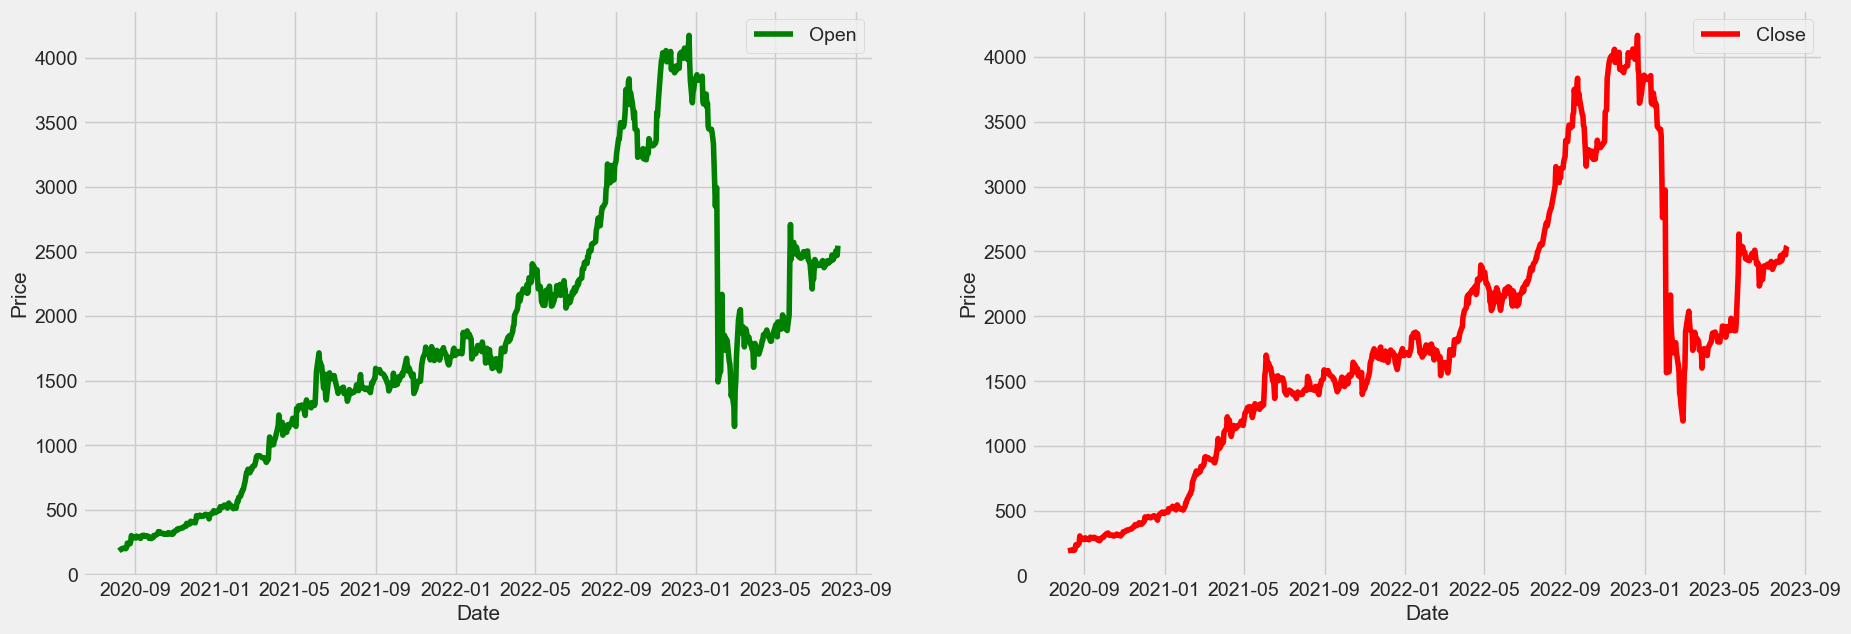

In [38]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

In [39]:
# normalizing all the values of all columns using MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,Close
Date,,
2020-08-07,0.000000,0.000000
2020-08-10,0.002967,0.000705
2020-08-11,0.003743,0.000743
2020-08-12,0.003693,0.001208
2020-08-13,0.004469,0.001976
2020-08-14,0.005346,0.000831
2020-08-17,0.004094,0.001234
2020-08-18,0.004745,0.005236
2020-08-19,0.008313,0.011744


In [40]:
# splitting the data into training and test set
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

559

In [41]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((559, 2), (186, 2))

In [42]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [43]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((509, 50, 2), (509, 2), (136, 50, 2), (136, 2))

In [44]:
# imported Sequential from keras.models 
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
16/16 [==============================] - 22s 319ms/step - loss: 0.0582 - mean_absolute_error: 0.1809 - val_loss: 0.0082 - val_mean_absolute_error: 0.0569
Epoch 2/100
16/16 [==============================] - 1s 86ms/step - loss: 0.0061 - mean_absolute_error: 0.0564 - val_loss: 0.0128 - val_mean_absolute_error: 0.0781
Epoch 3/100
16/16 [==============================] - 1s 91ms/step - loss: 0.0030 - mean_absolute_error: 0.0438 - val_loss: 0.0084 - val_mean_absolute_error: 0.0566
Epoch 4/100
16/16 [==============================] - 2s 121ms/step - loss: 0.0012 - mean_absolute_error: 0.0259 - val_loss: 0.0113 - val_mean_absolute_error: 0.0612
Epoch 5/100
16/16 [==============================] - 2s 125ms/step - loss: 9.1425e-04 - mean_absolute_error: 0.0221 - val_loss: 0.0119 - val_mean_absolute_error: 0.0640
Epoch 6/100
16/16 [==============================] - 2s 129ms/step - loss: 9.0870e-04 - mean_absolute_error: 0.0221 - val_loss: 0.0118 - val_mean_absolute_error: 0.0633
Epo

In [46]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

5/5 [==============================] - 3s 32ms/step


array([[0.90133345, 0.89359397],
       [0.89376897, 0.8859499 ],
       [0.8874755 , 0.8795688 ],
       [0.8766818 , 0.868515  ],
       [0.86515164, 0.856982  ]], dtype=float32)

In [47]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[3780.9307, 3742.6125],
       [3750.7185, 3712.2473],
       [3725.5828, 3686.8992],
       [3682.4734, 3642.989 ],
       [3636.4224, 3597.175 ]], dtype=float32)

In [48]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-136:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-136:].index)], axis=1)

In [49]:
# Inversing normalization/scaling 
df_merge[['Open','Close']] = MMS.inverse_transform(df_merge[['Open','Close']])
df_merge.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2023-01-17,3620.000000,3639.350098,3780.930664,3742.612549
2023-01-18,3648.000000,3596.699951,3750.718506,3712.247314
2023-01-19,3470.000000,3463.550049,3725.582764,3686.899170
2023-01-20,3450.000000,3456.149902,3682.473389,3642.989014
2023-01-23,3443.050049,3436.350098,3636.422363,3597.175049


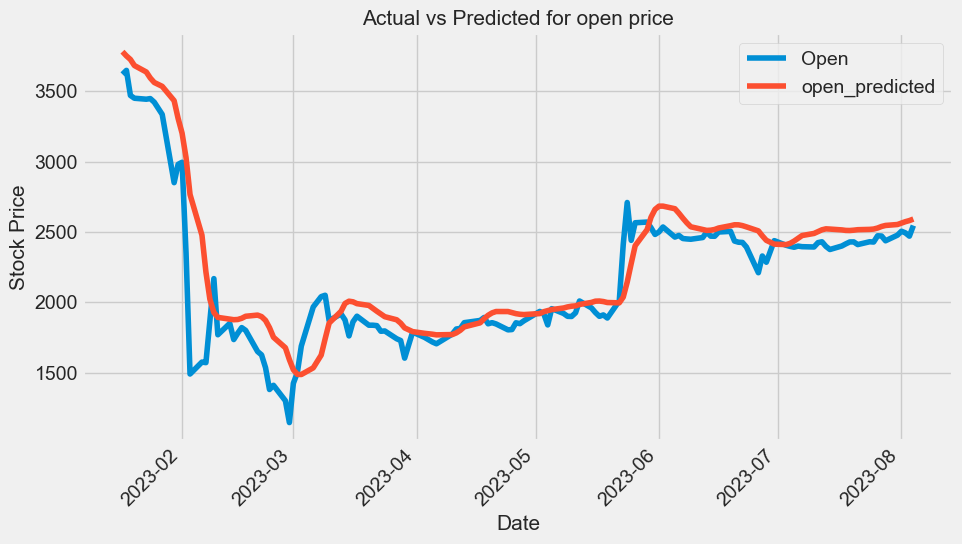

In [50]:
# plotting the actual open and predicted open prices on date index
df_merge[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

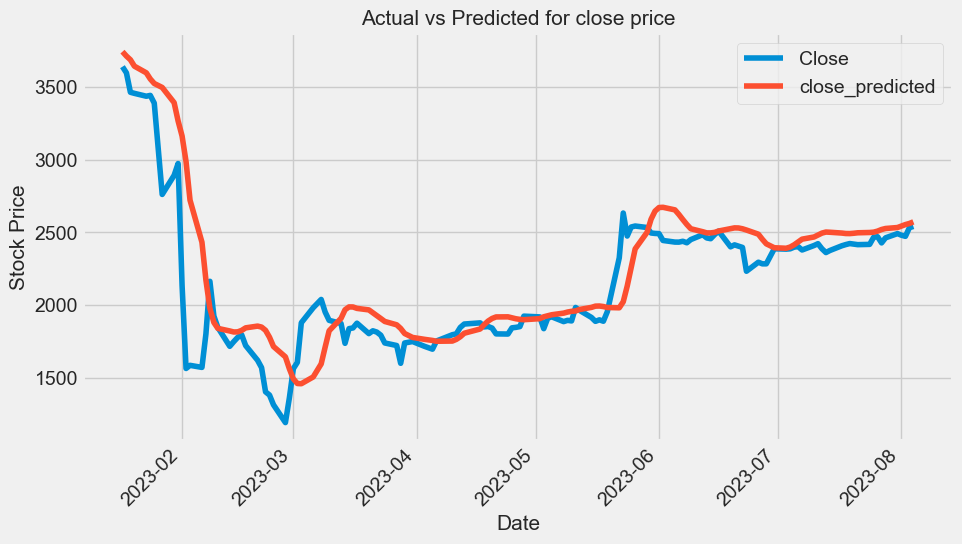

In [51]:
# plotting the actual close and predicted close prices on date index 
df_merge[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()


In [52]:
# Creating a dataframe and adding 10 days to existing index 

df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2023-08-01':'2023-08-10']

,Open,Close,open_predicted,close_predicted
2023-08-01,2504.850098,2481.100098,2562.502930,2544.018799
2023-08-02,2493.000000,2473.550049,2572.722900,2554.220703
2023-08-03,2469.899902,2532.600098,2580.470459,2561.890869
2023-08-04,2545.300049,2541.800049,2591.244629,2572.902100
2023-08-05,NaN,NaN,NaN,NaN
2023-08-06,NaN,NaN,NaN,NaN
2023-08-07,NaN,NaN,NaN,NaN
2023-08-08,NaN,NaN,NaN,NaN
2023-08-09,NaN,NaN,NaN,NaN
2023-08-10,NaN,NaN,NaN,NaN


In [64]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [65]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 198ms/step


In [66]:
# inversing Normalization/scaling
upcoming_prediction[['Open','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])

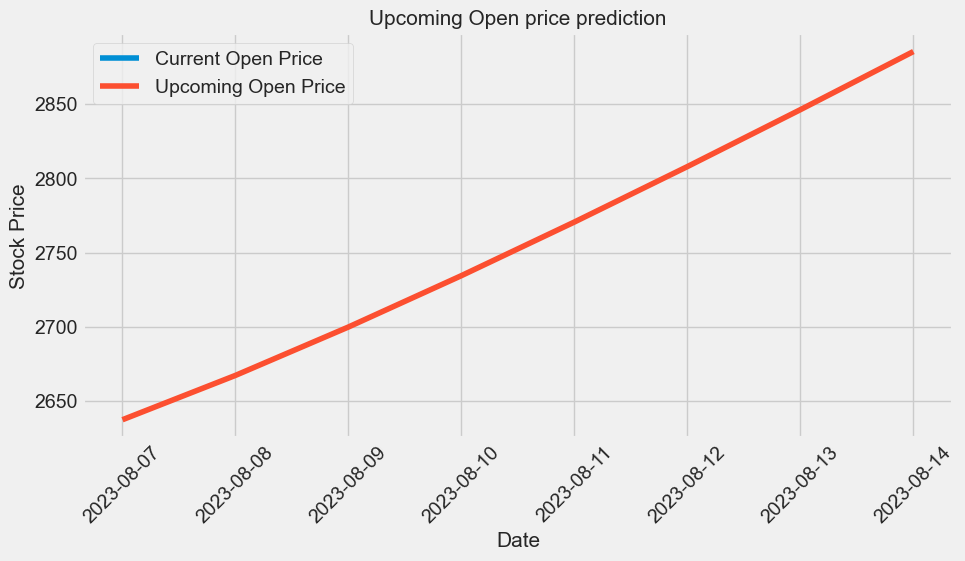

In [67]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2023-08-07':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2023-08-07':,'Open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

In [ ]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2023-08-07':,'Close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2023-08-07':,'Close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()